<h2>Hierarchical Equations of Motion Comparative Analysis</h2>

In this notebook, we look at the effect of the bath characteristics on the population dynamics. 

In [2]:
import math
import cmath
import sys
import cmath
import math
import os
import h5py
import matplotlib.pyplot as plt

import numpy as np

# Libra dependancies
if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *
import util.libutil as comn

from libra_py import units
from libra_py import data_read
import libra_py.dynamics.heom.compute as compute

# For plotting
colors = {}

colors.update({"11": "#8b1a0e"})  # red
colors.update({"12": "#FF4500"})  # orangered
colors.update({"13": "#B22222"})  # firebrick
colors.update({"14": "#DC143C"})  # crimson

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue

colors.update({"41": "#2F4F4F"})  # darkslategray

clrs_index = ["11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24"]

/home/storytemen/miniconda2/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<flo

Initial setup of the Hamiltonian, starting population density, and parameters. The parameters to pay attention to here are eta, gamma, and temperature. These control the characteristics of the bath. Gamma is the electron-phonon interation rate and eta is the reorganization energy.

The first set of cases will use the same Hamiltonian with $\Delta$E = 100 cm$^{-1}$. 

In the following runs, only one of these parameters will be changed at a time. 

In [2]:
Ham = CMATRIX(2,2)
Ham.set(0, 0, 50.0 * units.inv_cm2Ha);    Ham.set(0, 1, 200.0 * units.inv_cm2Ha);
Ham.set(1, 0,200.0 * units.inv_cm2Ha);    Ham.set(1, 1, -50.0 * units.inv_cm2Ha);

rho = CMATRIX(2,2)
rho.set(0, 0, 1.0+0.0j)


params = { "KK":0, "LL":10,
           "gamma": 1/(0.1 * units.ps2au),
           "eta": 2.0 * 50.0 * units.inv_cm2Ha,
           "temperature": 300.0,
           "el_phon_couplings":initialize_el_phonon_couplings(2),

           "dt":0.1*units.fs2au, "nsteps":10000,
           "verbosity":-1, "progress_frequency":0.1,

           "truncation_scheme":4, "do_scale":0,
           "adm_tolerance":1e-10, "adm_deriv_tolerance":1e-15,
           "filter_after_steps":1,"do_zeroing":1,
           "num_threads":16,

           "prefix":"comparative/out_default_0",
           "hdf5_output_level":0, "txt_output_level":0, "mem_output_level":3,
           "properties_to_save": [ "timestep", "time", "denmat"],
           "use_compression":0, "compression_level":[0,0,0]
         }

The compute.run_dynamics command executes the HEOM method. First it is run with the parameters given above. The parameters are updated to change both eta and the prefix before executing the method again. The prefix controls where the output data file is saved, and it is changed to avoid overwriting previous runs. 

In [3]:
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"comparative/out_eta_50_0", "eta":50.0 * units.inv_cm2Ha})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"comparative/out_eta_250_0", "eta":250.0 * units.inv_cm2Ha})
compute.run_dynamics(params, Ham, rho)

 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 11.922169208526611 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 13.098195791244507 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations 

The population dynamics for different eta values are plotted together to show how the reorganization energy effects the dynamics.

/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


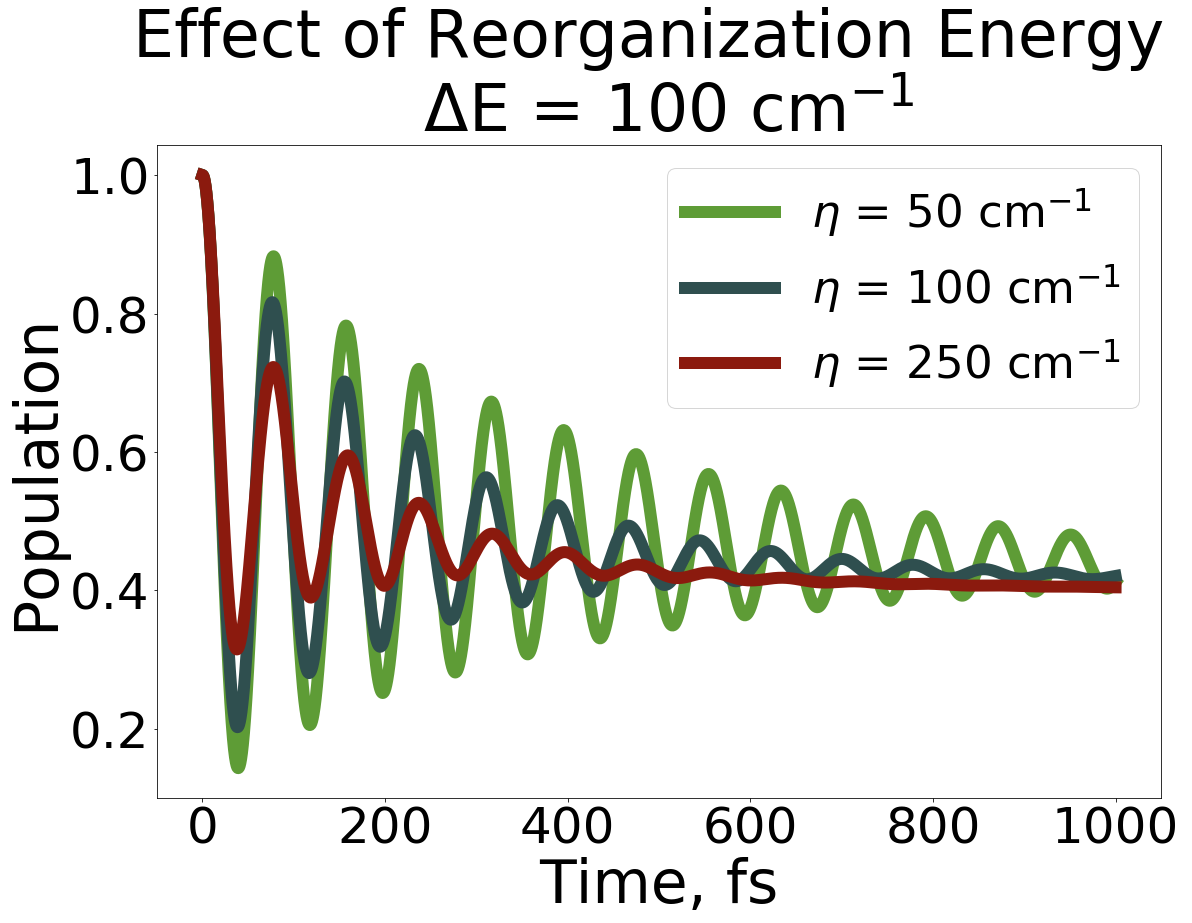

In [11]:
A = [ None, None ]

with h5py.File(F"comparative/out_eta_50_0/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"comparative/out_default_0/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 0,0])

C = [ None, None ]

with h5py.File(F"comparative/out_eta_250_0/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 0,0])


plt.figure(1, figsize=(18, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title('Effect of Reorganization Energy \n $\Delta$E = 100 cm$^{-1}$', fontsize=65)
plt.xlabel('Time, fs',fontsize=60)
plt.ylabel('Population',fontsize=60)
plt.tick_params(labelsize=50)
plt.plot(A[0], A[1], label="$\eta$ = 50 cm$^{-1}$", linewidth=12, color = colors["21"])
plt.plot(B[0], B[1], label="$\eta$ = 100 cm$^{-1}$", linewidth=12, color = colors["41"])
plt.plot(C[0], C[1], label="$\eta$ = 250 cm$^{-1}$", linewidth=12, color = colors["11"])

plt.legend(fontsize=45)
plt.show()
plt.close()

The parameters are updated again to now look at the effect of the electron-phonon interaction frequency. Eta is changed back to its original value and gamma is assigned two different values. 

In [5]:
params.update({"prefix":"comparative/out_gamma_5_0", "eta":100.0 * units.inv_cm2Ha, "gamma":5/(1 * units.ps2au)})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"comparative/out_gamma_100_0", "gamma":100/(1 * units.ps2au)})
compute.run_dynamics(params, Ham, rho)

 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 12.670922994613647 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 12.078967571258545 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data


Plotting the population dynamics for different values of gamma.

/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


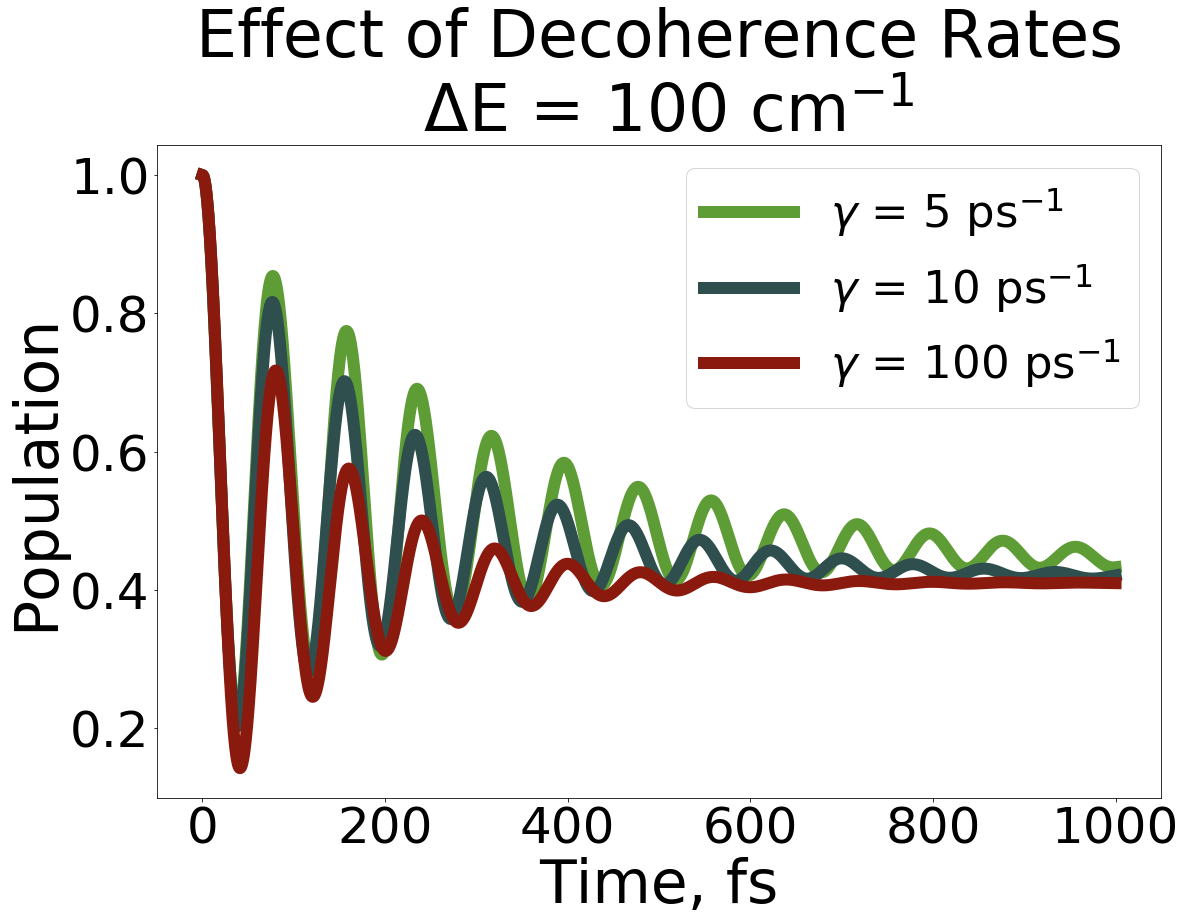

In [12]:
A = [ None, None ]

with h5py.File(F"comparative/out_gamma_5_0/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"comparative/out_default_0/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 0,0])

C = [ None, None ]

with h5py.File(F"comparative/out_gamma_100_0/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 0,0])


plt.figure(1, figsize=(18, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title('Effect of Decoherence Rates\n $\Delta$E = 100 cm$^{-1}$', fontsize=65)
plt.xlabel('Time, fs',fontsize=60)
plt.ylabel('Population',fontsize=60)
plt.tick_params(labelsize=50)
plt.plot(A[0], A[1], label="$\gamma$ = 5 ps$^{-1}$", linewidth=12, color = colors["21"])
plt.plot(B[0], B[1], label="$\gamma$ = 10 ps$^{-1}$", linewidth=12, color = colors["41"])
plt.plot(C[0], C[1], label="$\gamma$ = 100 ps$^{-1}$", linewidth=12, color = colors["11"])

plt.legend(fontsize=45)
plt.show()
plt.close()

As before, the parameters are updated to observe how temperature effect population dynamics. 

In [7]:
params.update({"prefix":"comparative/out_temp_150_0", "gamma":10/(1 * units.ps2au), "temperature":150})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"comparative/out_temp_500_0", "temperature":500})
compute.run_dynamics(params, Ham, rho)

 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 12.777605772018433 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 13.801472663879395 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data


Plotting population dynamics at different temperatures together. 

/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


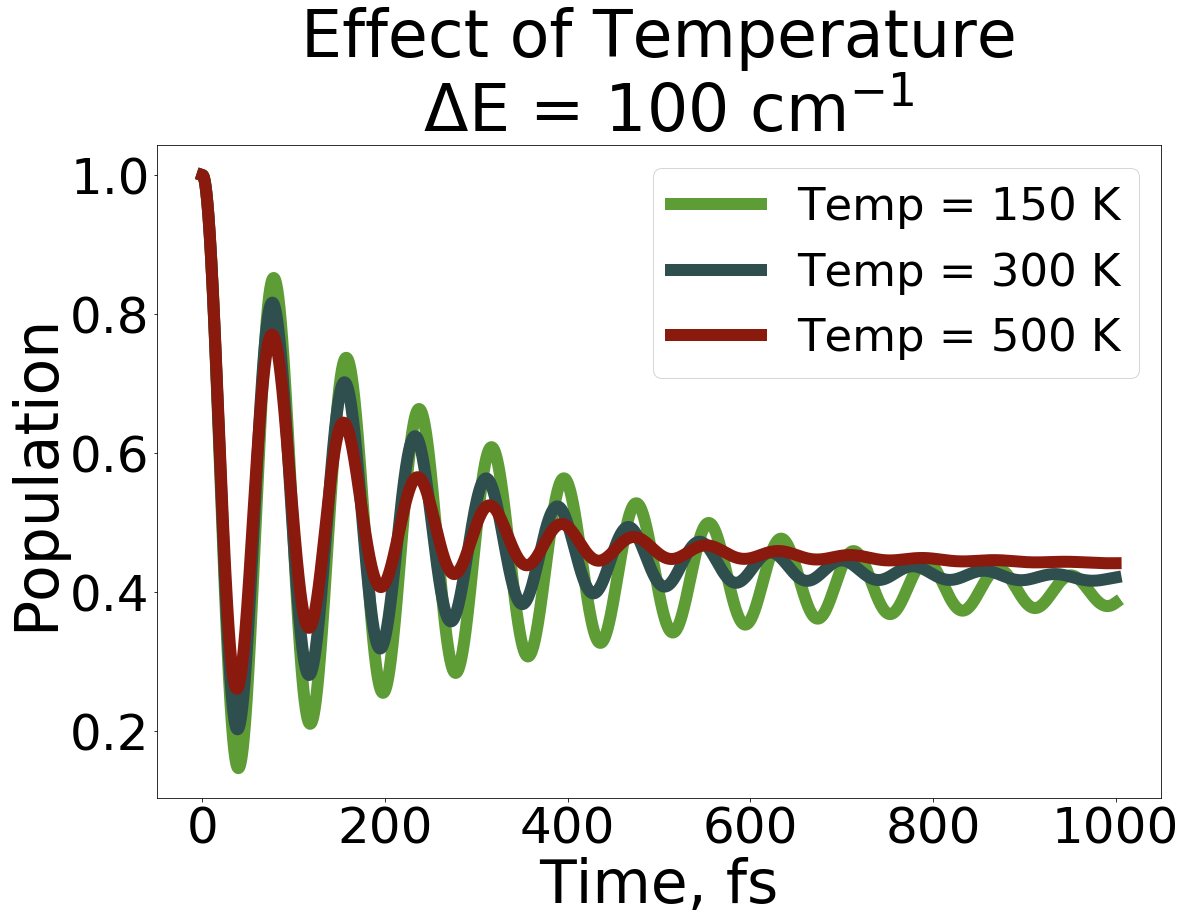

In [9]:
A = [ None, None ]

with h5py.File(F"comparative/out_temp_150_0/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"comparative/out_default_0/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 0,0])

C = [ None, None ]

with h5py.File(F"comparative/out_temp_500_0/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 0,0])


plt.figure(1, figsize=(18, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title('Effect of Temperature\n $\Delta$E = 100 cm$^{-1}$', fontsize=65)
plt.xlabel('Time, fs',fontsize=60)
plt.ylabel('Population',fontsize=60)
plt.tick_params(labelsize=50)
plt.plot(A[0], A[1], label=f"Temp = 150 K", linewidth=12, color = colors["21"])
plt.plot(B[0], B[1], label=f"Temp = 300 K", linewidth=12, color = colors["41"])
plt.plot(C[0], C[1], label=f"Temp = 500 K", linewidth=12, color = colors["11"])

plt.legend(fontsize=45)
plt.show()
plt.close()

<h3>Change in $\Delta$E</h3>
The above runs will be repeated with a new Hamiltonian, with $\Delta$E = 200 cm$^{-1}$

Redfine the Hamiltonian and reset parameters to default.

In [9]:
Ham = CMATRIX(2,2)
Ham.set(0, 0, 100.0 * units.inv_cm2Ha);    Ham.set(0, 1, 200.0 * units.inv_cm2Ha);
Ham.set(1, 0,200.0 * units.inv_cm2Ha);    Ham.set(1, 1, -100.0 * units.inv_cm2Ha);
 
params = { "KK":0, "LL":10,
           "gamma": 1/(0.1 * units.ps2au),
           "eta": 2.0 * 50.0 * units.inv_cm2Ha,
           "temperature": 300.0,
           "el_phon_couplings":initialize_el_phonon_couplings(2),

           "dt":0.1*units.fs2au, "nsteps":10000,
           "verbosity":-1, "progress_frequency":0.1,

           "truncation_scheme":4, "do_scale":0,
           "adm_tolerance":1e-10, "adm_deriv_tolerance":1e-15,
           "filter_after_steps":1,"do_zeroing":1,
           "num_threads":16,

           "prefix":"comparative/out_default_1",
           "hdf5_output_level":0, "txt_output_level":0, "mem_output_level":3,
           "properties_to_save": [ "timestep", "time", "denmat"],
           "use_compression":0, "compression_level":[0,0,0]
         }

The compute.run_dynamics command executes the HEOM method. First it is run with the parameters given above. The parameters are updated to change both eta and the prefix before executing the method again. The prefix controls where the output data file is saved, and it is changed to avoid overwriting previous runs. 

In [10]:
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"comparative/out_eta_50_1", "eta":50.0 * units.inv_cm2Ha})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"comparative/out_eta_250_1", "eta":250.0 * units.inv_cm2Ha})
compute.run_dynamics(params, Ham, rho)

 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 14.227644681930542 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 12.299065113067627 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations 

The population dynamics for different eta values are plotted together to show how the reorganization energy effects the dynamics.

/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


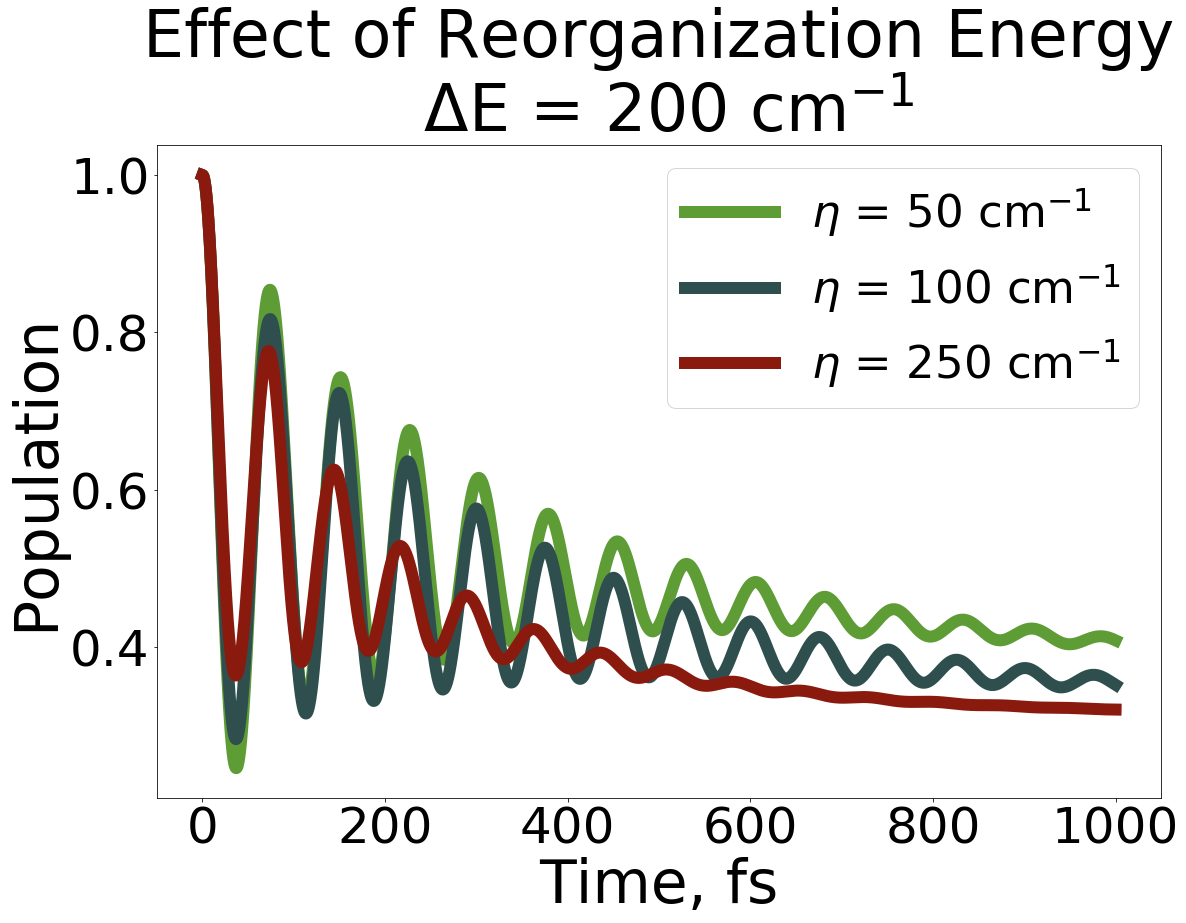

In [8]:
A = [ None, None ]

with h5py.File(F"comparative/out_eta_50_1/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"comparative/out_default_1/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 0,0])

C = [ None, None ]

with h5py.File(F"comparative/out_eta_250_1/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 0,0])


plt.figure(1, figsize=(18, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title('Effect of Reorganization Energy\n $\Delta$E = 200 cm$^{-1}$', fontsize=65)
plt.xlabel('Time, fs',fontsize=60)
plt.ylabel('Population',fontsize=60)
plt.tick_params(labelsize=50)
plt.plot(A[0], A[1], label="$\eta$ = 50 cm$^{-1}$", linewidth=12, color = colors["21"])
plt.plot(B[0], B[1], label="$\eta$ = 100 cm$^{-1}$", linewidth=12, color = colors["41"])
plt.plot(C[0], C[1], label="$\eta$ = 250 cm$^{-1}$", linewidth=12, color = colors["11"])

plt.legend(fontsize=45)
plt.show()
plt.close()

The parameters are updated again to now look at the effect of the electron-phonon interaction frequency. Eta is changed back to its original value and gamma is assigned two different values. 

In [12]:
params.update({"prefix":"comparative/out_gamma_5_1", "eta":100.0 * units.inv_cm2Ha, "gamma":5/(1 * units.ps2au)})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"comparative/out_gamma_100_1", "gamma":100/(1 * units.ps2au)})
compute.run_dynamics(params, Ham, rho)

 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 11.907651424407959 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 13.503777265548706 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data


Plotting the population dynamics for different values of gamma.

/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


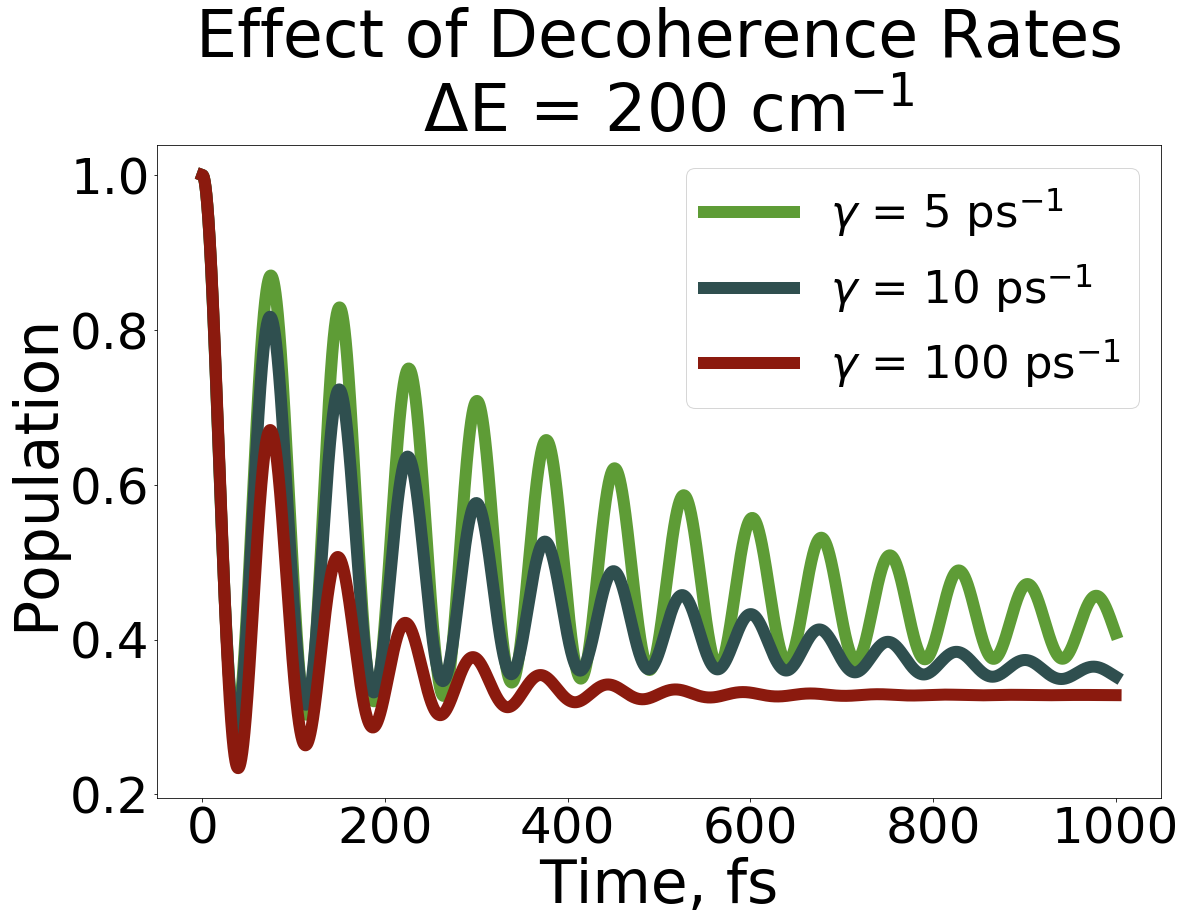

In [13]:
A = [ None, None ]

with h5py.File(F"comparative/out_gamma_5_1/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"comparative/out_default_1/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 0,0])

C = [ None, None ]

with h5py.File(F"comparative/out_gamma_100_1/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 0,0])


plt.figure(1, figsize=(18, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title('Effect of Decoherence Rates\n $\Delta$E = 200 cm$^{-1}$', fontsize=65)
plt.xlabel('Time, fs',fontsize=60)
plt.ylabel('Population',fontsize=60)
plt.tick_params(labelsize=50)
plt.plot(A[0], A[1], label="$\gamma$ = 5 ps$^{-1}$", linewidth=12, color = colors["21"])
plt.plot(B[0], B[1], label="$\gamma$ = 10 ps$^{-1}$", linewidth=12, color = colors["41"])
plt.plot(C[0], C[1], label="$\gamma$ = 100 ps$^{-1}$", linewidth=12, color = colors["11"])

plt.legend(fontsize=45)
plt.show()
plt.close()

As before, the parameters are updated to observe how temperature effect population dynamics. 

In [14]:
params.update({"prefix":"comparative/out_temp_150_1", "gamma":10/(1 * units.ps2au), "temperature":150})
compute.run_dynamics(params, Ham, rho)

params.update({"prefix":"comparative/out_temp_500_1", "temperature":500})
compute.run_dynamics(params, Ham, rho)

 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 12.733337879180908 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data
 step= 0
 step= 1000
 step= 2000
 step= 3000
 step= 4000
 step= 5000
 step= 6000
 step= 7000
 step= 8000
 step= 9000
Calculations took 14.316227912902832 seconds
In mem_saver.save_data()
data_name =  ['timestep', 'time', 'denmat']
keywords =  ['timestep', 'time', 'denmat']
keys =  dict_keys(['timestep', 'time', 'denmat'])
Saving the dataset named timestep/data
Saving the dataset named time/data
Saving the dataset named denmat/data


Plotting population dynamics at different temperatures together. 

/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/storytemen/miniconda2/envs/py37/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


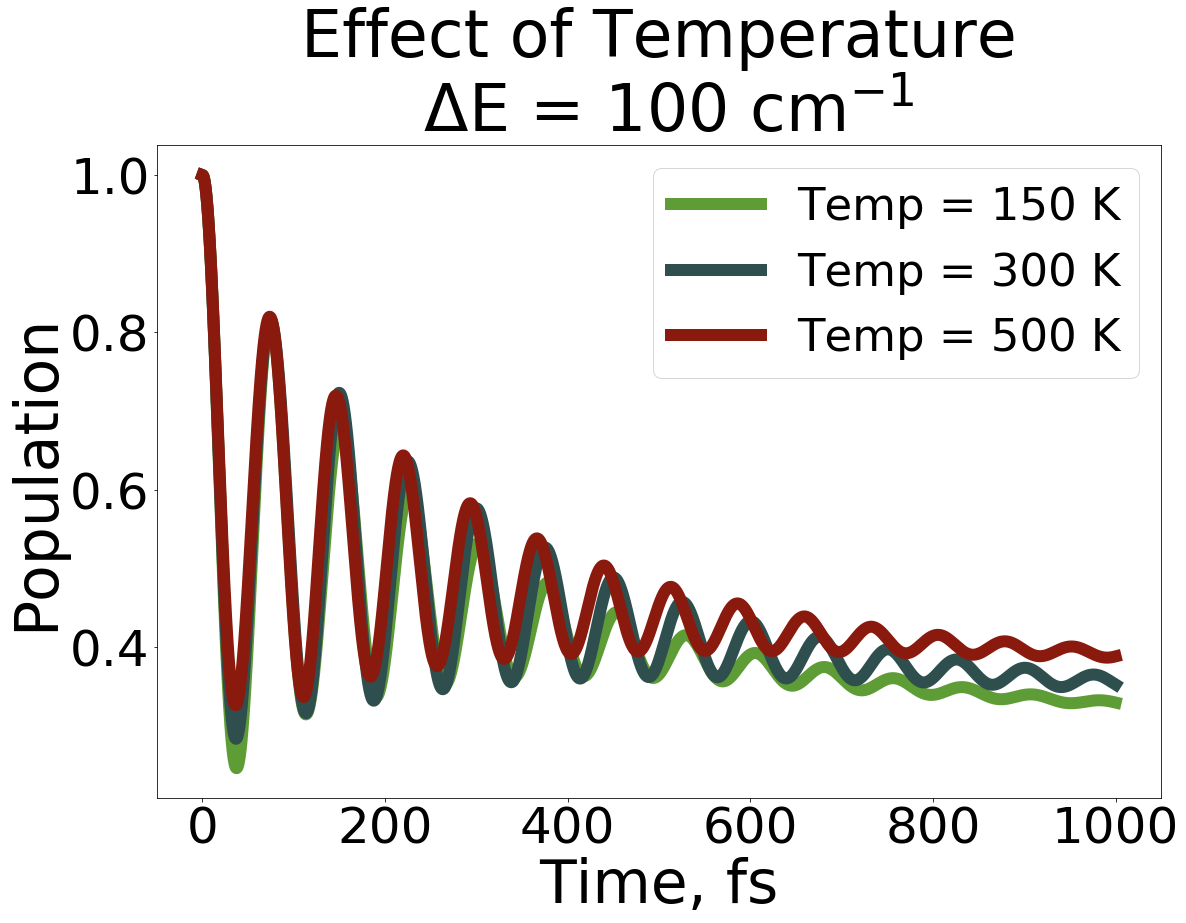

In [6]:
A = [ None, None ]

with h5py.File(F"comparative/out_temp_150_1/mem_data.hdf", 'r') as f:
    A[0] = list(f["time/data"][:] * units.au2fs)
    A[1] = list(f["denmat/data"][:, 0,0])

B = [ None, None ]

with h5py.File(F"comparative/out_default_1/mem_data.hdf", 'r') as f:
    B[0] = list(f["time/data"][:] * units.au2fs)
    B[1] = list(f["denmat/data"][:, 0,0])

C = [ None, None ]

with h5py.File(F"comparative/out_temp_500_1/mem_data.hdf", 'r') as f:
    C[0] = list(f["time/data"][:] * units.au2fs)
    C[1] = list(f["denmat/data"][:, 0,0])


plt.figure(1, figsize=(18, 12)) # dpi=300, frameon=False)
plt.subplot(1,1,1)
plt.title('Effect of Temperature\n $\Delta$E = 100 cm$^{-1}$', fontsize=65)
plt.xlabel('Time, fs',fontsize=60)
plt.ylabel('Population',fontsize=60)
plt.tick_params(labelsize=50)
plt.plot(A[0], A[1], label=f"Temp = 150 K", linewidth=12, color = colors["21"])
plt.plot(B[0], B[1], label=f"Temp = 300 K", linewidth=12, color = colors["41"])
plt.plot(C[0], C[1], label=f"Temp = 500 K", linewidth=12, color = colors["11"])

plt.legend(fontsize=45)
plt.show()
plt.close()